In [ ]:
import pandas as pd
df = pd.read_excel('/content/cdata_final.xlsx')
df.isna().sum()

,0
Question,0
Correct_Code,0
Code_with_Error,0
Type_of_Error,0
Header_and_Main_Declaration,0
Incomprehensible_Code,1
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,2
Correct_code_and_output,0
Final_Marks,0


In [ ]:
df = df.fillna(method='pad')

<ipython-input-22-4d7ddb4551e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [ ]:
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [ ]:
target = []
for data in df['Final_Marks']:
    if data < 5:
        target.append(0)
    else:
        target.append(1)

df = df.drop('Final_Marks', axis = 1)

In [ ]:
df['Target'] = target

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dividing data into test and train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on both the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
#1
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Compute confusion matrices for training and test data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training Data:")
print(conf_matrix_train)

print("Confusion Matrix - Test Data:")
print(conf_matrix_test)

# Calculate and print precision, recall, and F1-score for training data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1-Score: {f1_train}")

# Calculate and print precision, recall, and F1-score for test data
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1-Score: {f1_test}")

Confusion Matrix - Training Data:
[[270   2]
 [  1 550]]
Confusion Matrix - Test Data:
[[117   2]
 [  5 229]]
Training Precision: 0.9963547182885849
Training Recall: 0.9963547995139733
Training F1-Score: 0.9963530953785315
Test Precision: 0.9804446934665668
Test Recall: 0.9801699716713881
Test F1-Score: 0.9802294272509036


In [ ]:
#2
import pandas as pd
import numpy as np
df2 = pd.read_excel('Lab Session Data.xlsx' , sheet_name="Purchase data")
A = df2.iloc[:, 1:4]
C = df2.iloc[:, 4]

print("Dimensionality of the vector space:", df2.shape)
print("Number of vectors:", df2.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))

A_inv = np.linalg.pinv(A)
price_of_each_item = (A_inv @ C)
print("Price of each item:", price_of_each_item)

# Calculate MSE, RMSE, MAPE and R2 scores for the price prediction
y = C
y_pred = A @ price_of_each_item
MSE = np.square(np.subtract(y,y_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
R2 = 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)

Dimensionality of the vector space: (10, 22)
Number of vectors: 10
Rank of matrix A: 3
Price of each item: [ 1. 55. 18.]
MSE: 3.2311742677852644e-27
RMSE: 5.684341886080802e-14
MAPE: 2.0176081332685152e-14
R2: 1.0


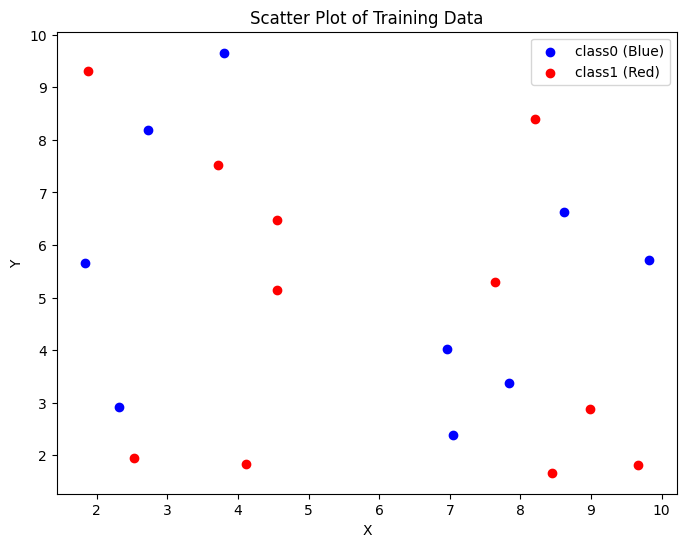

           X         Y   Class
0   1.873809  9.302482  class1
1   2.526750  1.957747  class1
2   1.834119  5.658614  class0
3   2.316320  2.921162  class0
4   8.614798  6.621759  class0
5   7.641292  5.303706  class1
6   4.549267  6.467298  class1
7   7.045940  2.395946  class0
8   4.115892  1.837298  class1
9   4.547485  5.143298  class1
10  9.660543  1.816116  class1
11  8.445213  1.669954  class1
12  2.719972  8.189673  class0
13  9.817183  5.714209  class0
14  7.844912  3.385401  class0
15  6.956764  4.022627  class0
16  3.718252  7.522062  class1
17  8.983792  2.876137  class1
18  8.205529  8.390318  class1
19  3.799493  9.656001  class0


In [ ]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 20 random data points for X and Y, with values ranging between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign these points to two different classes randomly
classes = np.random.choice(['class0', 'class1'], size=20)

# Create a DataFrame with X, Y, and Class columns
df3 = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Separate the points based on their class
X_class0 = df3[df3['Class'] == 'class0']['X']
Y_class0 = df3[df3['Class'] == 'class0']['Y']
X_class1 = df3[df3['Class'] == 'class1']['X']
Y_class1 = df3[df3['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_class0, Y_class0, c='blue', label='class0 (Blue)')
plt.scatter(X_class1, Y_class1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df3)

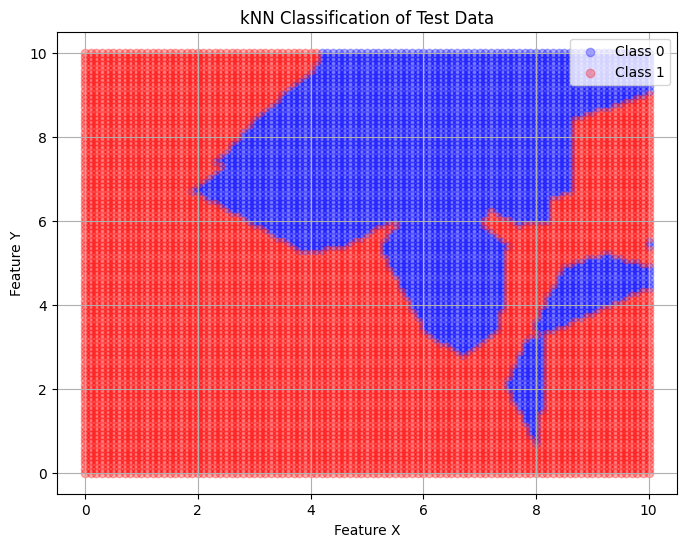

In [ ]:
#4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['X', 'Y']], df['Class'])

test_data['Class'] = knn.predict(test_data[['X', 'Y']])

plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()

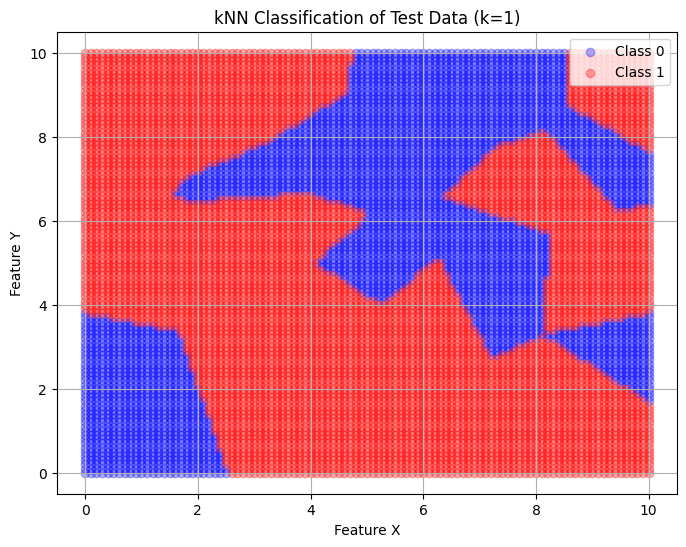

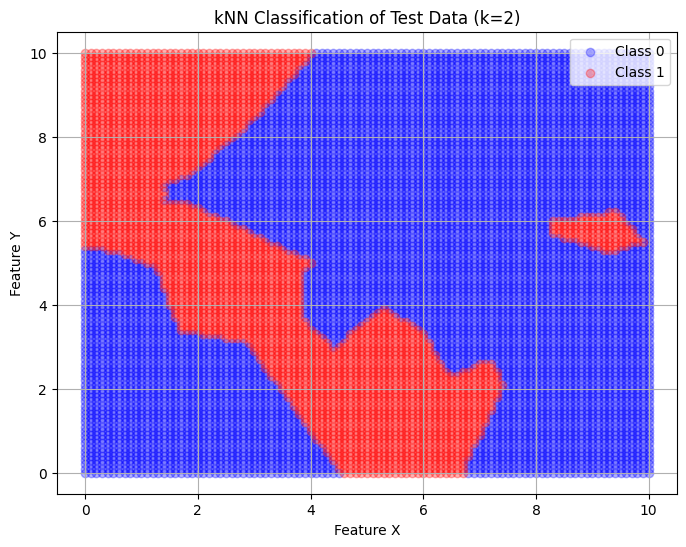

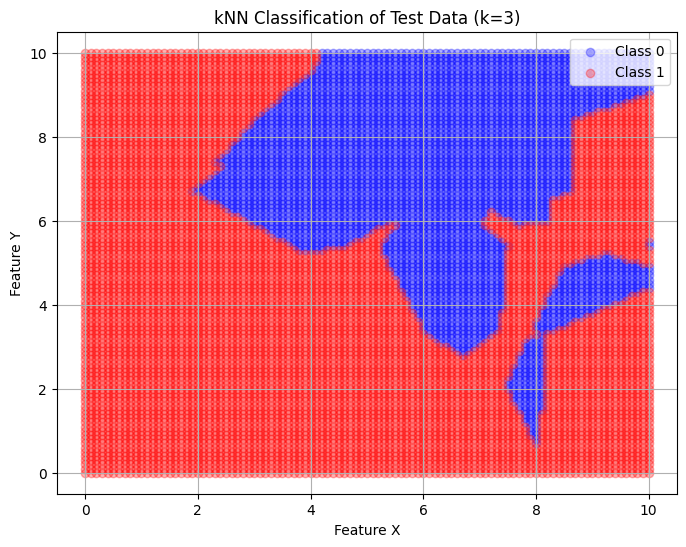

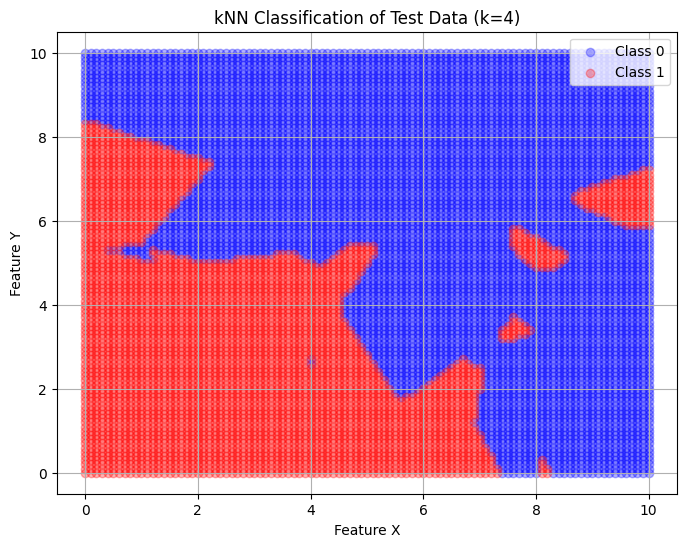

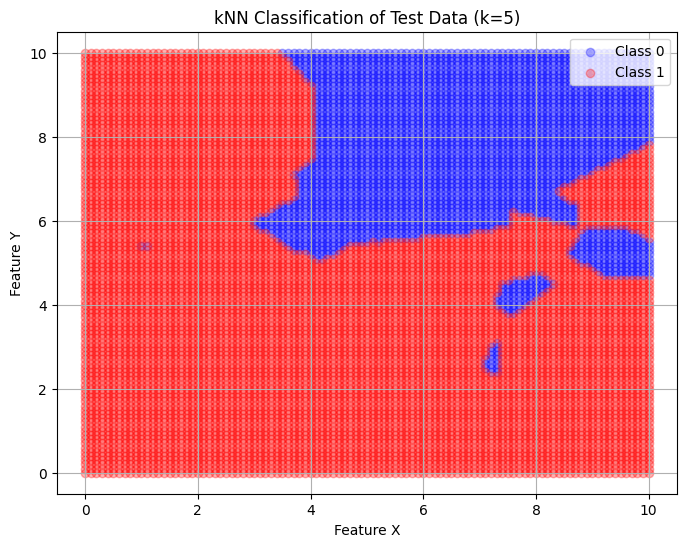

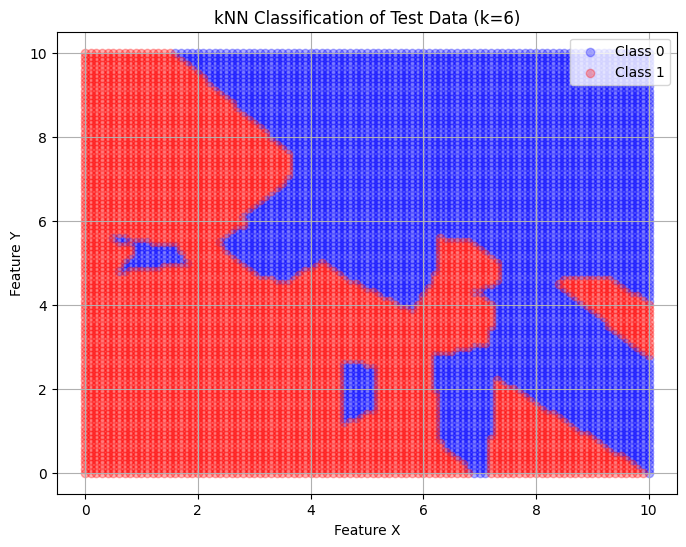

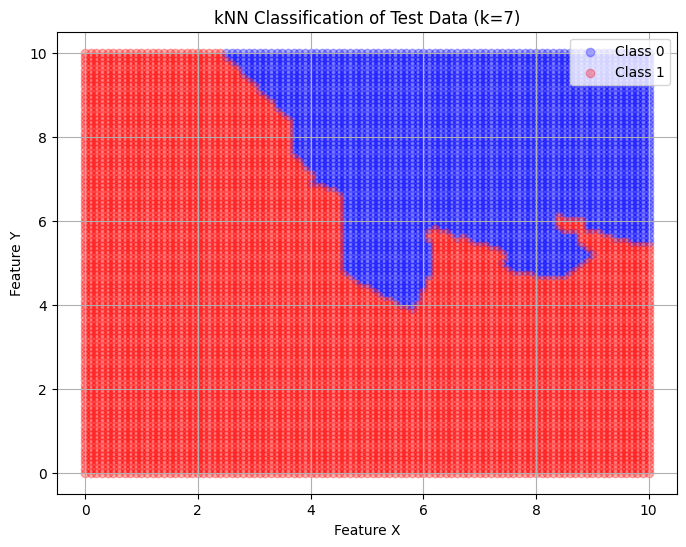

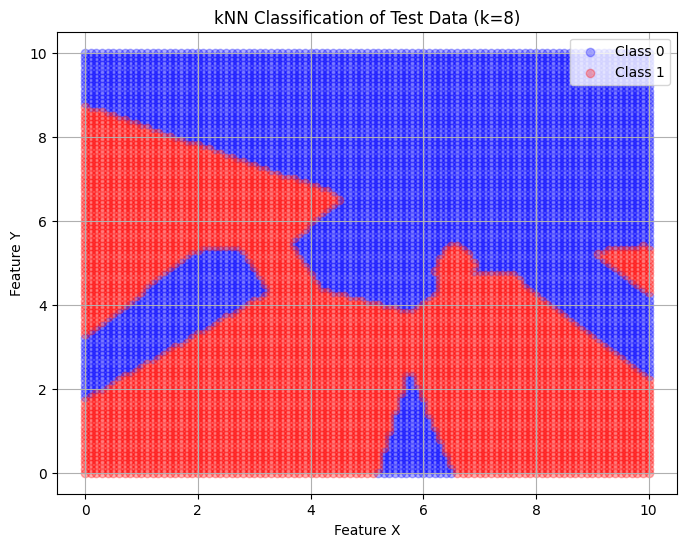

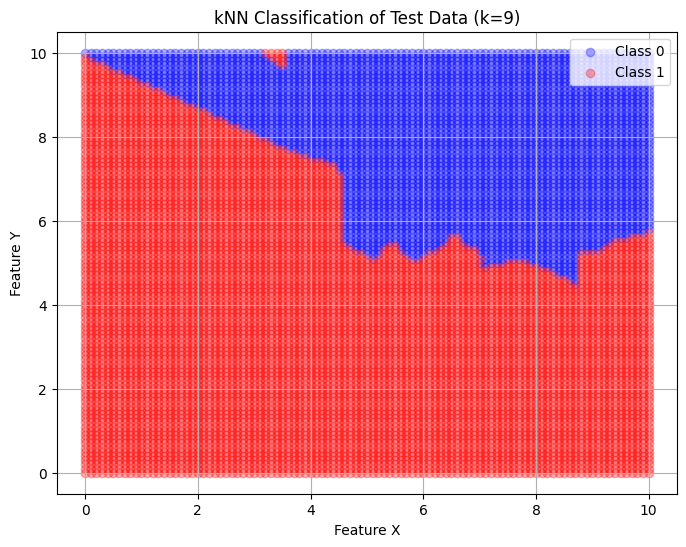

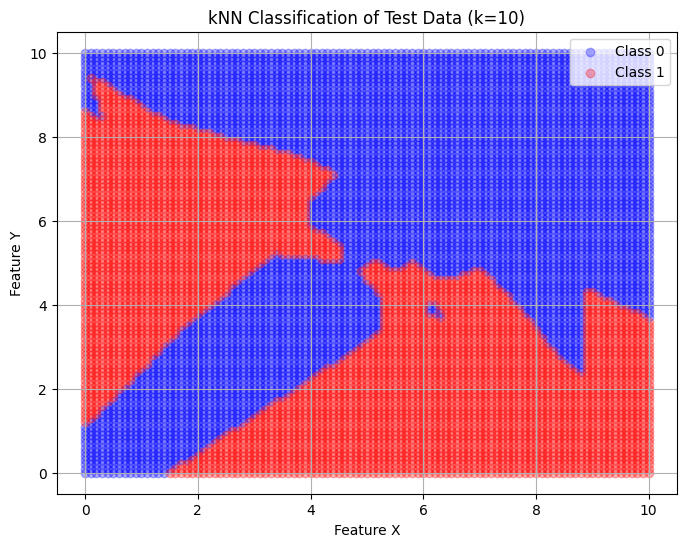

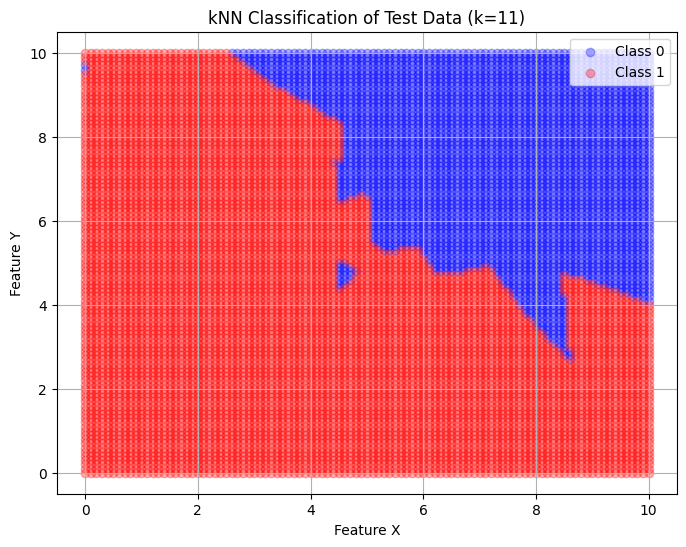

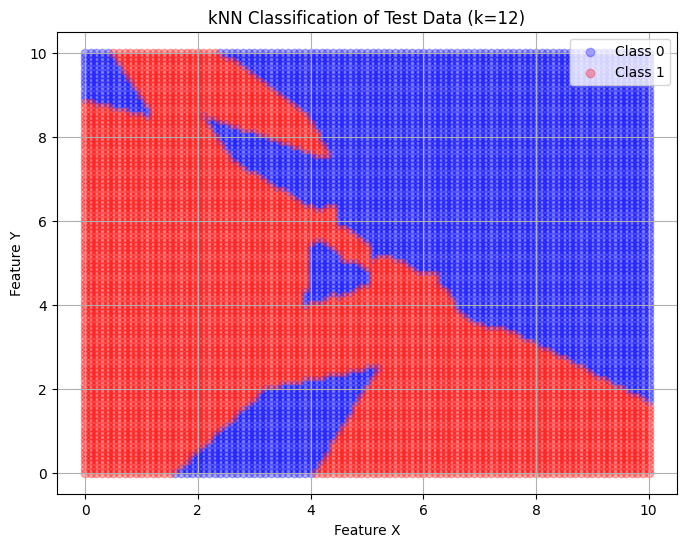

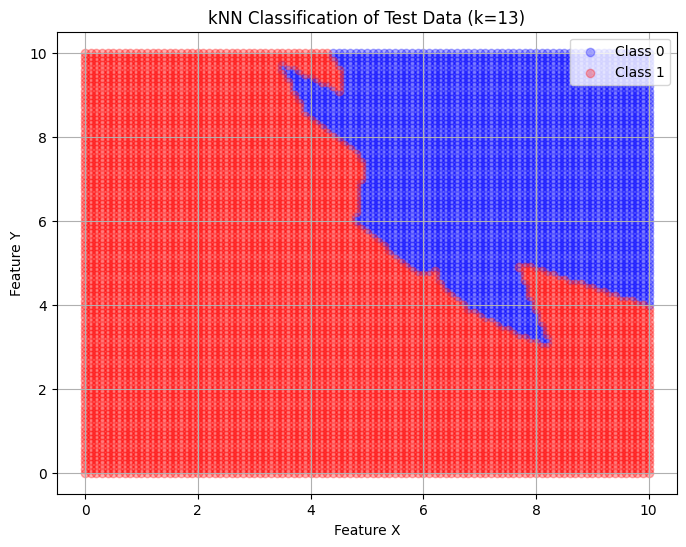

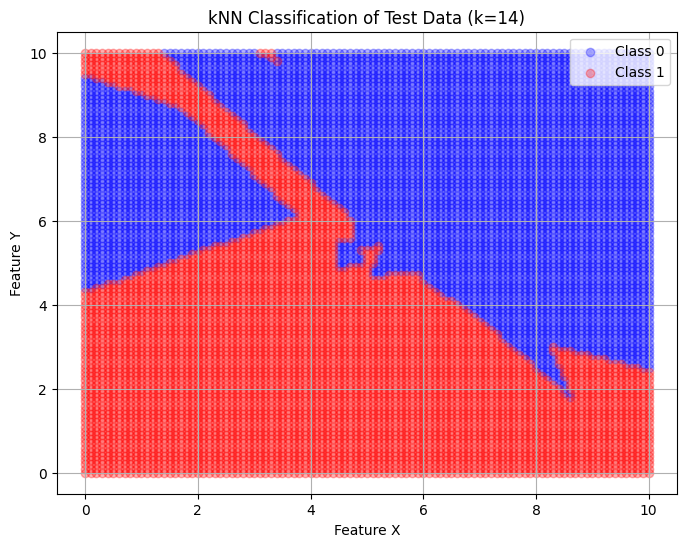

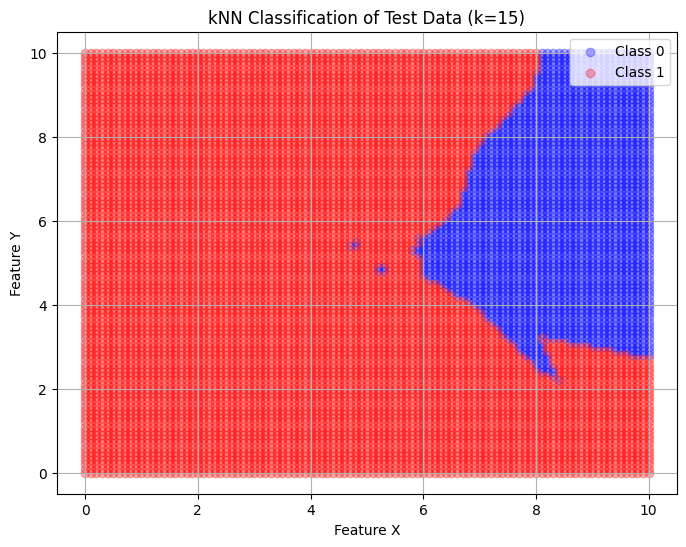

In [ ]:
#5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']], df['Class'])

    test_data['Class'] = knn.predict(test_data[['X', 'Y']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()

<ipython-input-32-c674ab719690>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


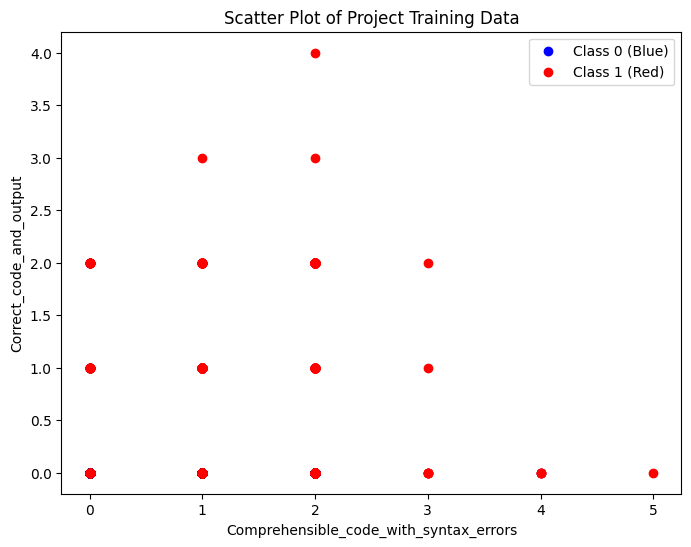

In [ ]:
#6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step A3: Prepare the Project Data
df = pd.read_excel('/content/cdata_final.xlsx')
df = df.fillna(method='pad')

# Process the data
df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target

# Select two features and the target
df = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output', 'Target']]

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Target'] == 0]['Comprehensible_code_with_syntax_errors'],
            df[df['Target'] == 0]['Correct_code_and_output'],
            color='blue', label='Class 0 (Blue)')
plt.scatter(df[df['Target'] == 1]['Comprehensible_code_with_syntax_errors'],
            df[df['Target'] == 1]['Correct_code_and_output'],
            color='red', label='Class 1 (Red)')

plt.xlabel('Comprehensible_code_with_syntax_errors')
plt.ylabel('Correct_code_and_output')
plt.title('Scatter Plot of Project Training Data')
plt.legend()
plt.show()


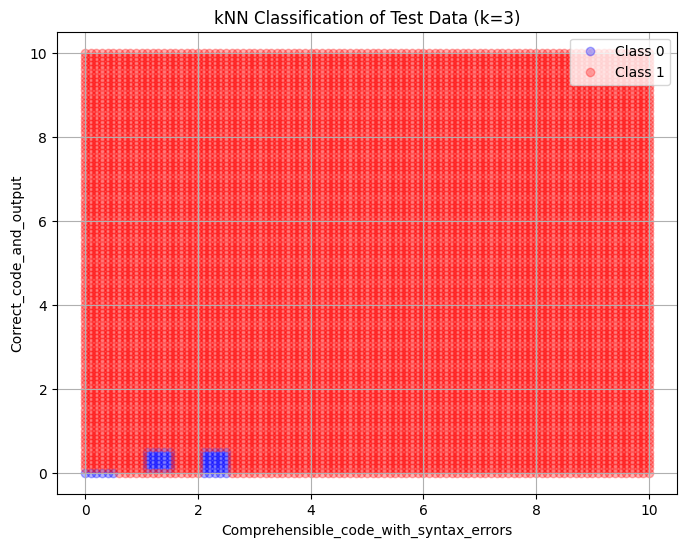

In [ ]:
# Generate Test Data
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X_test.ravel(),
    'Correct_code_and_output': Y_test.ravel()
})

# Train the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

# Classify the test data
test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

# Plot the classification results
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
            test_data['Correct_code_and_output'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
            test_data['Correct_code_and_output'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('Comprehensible_code_with_syntax_errors')
plt.ylabel('Correct_code_and_output')
plt.title('kNN Classification of Test Data (k=3)')
plt.legend()
plt.grid(True)
plt.show()


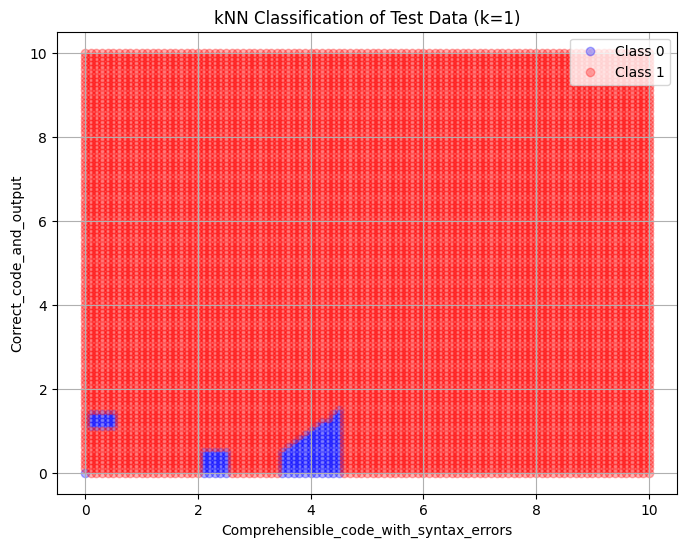

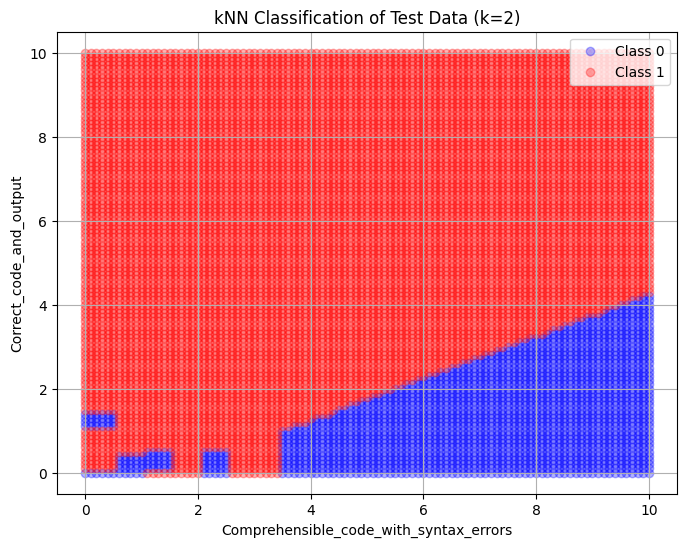

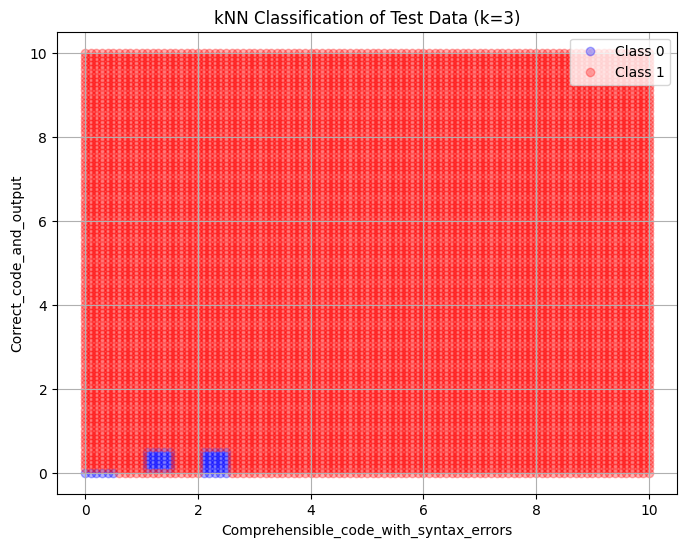

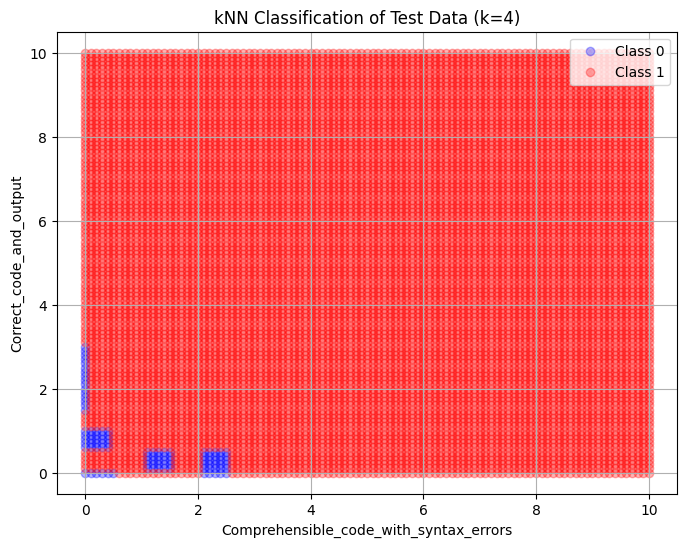

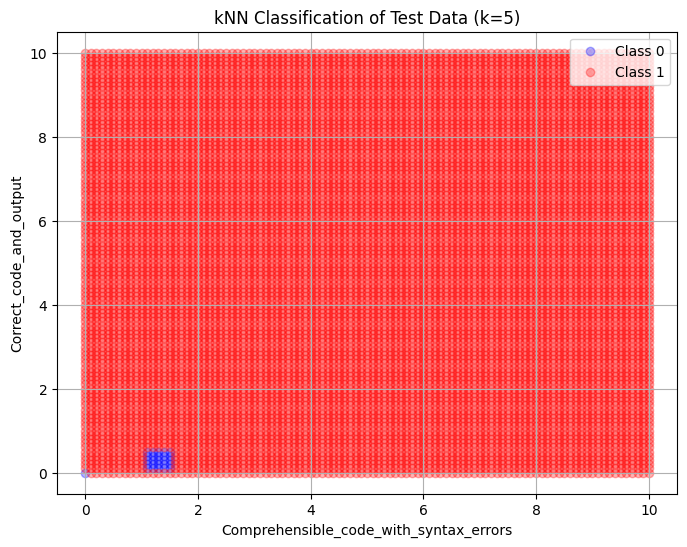

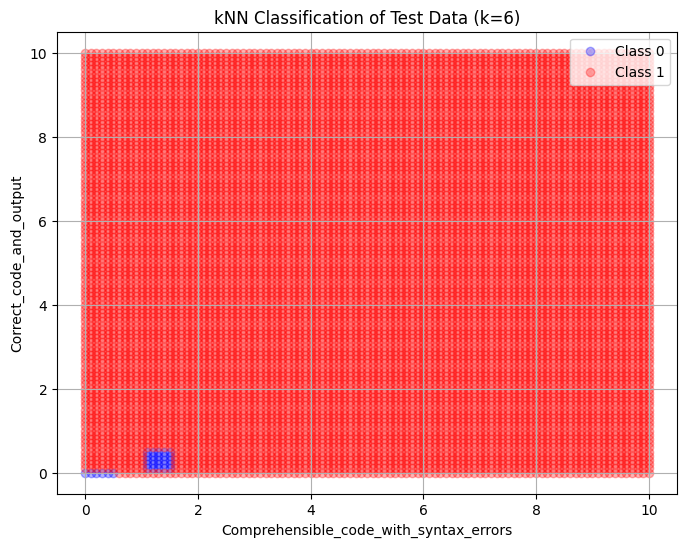

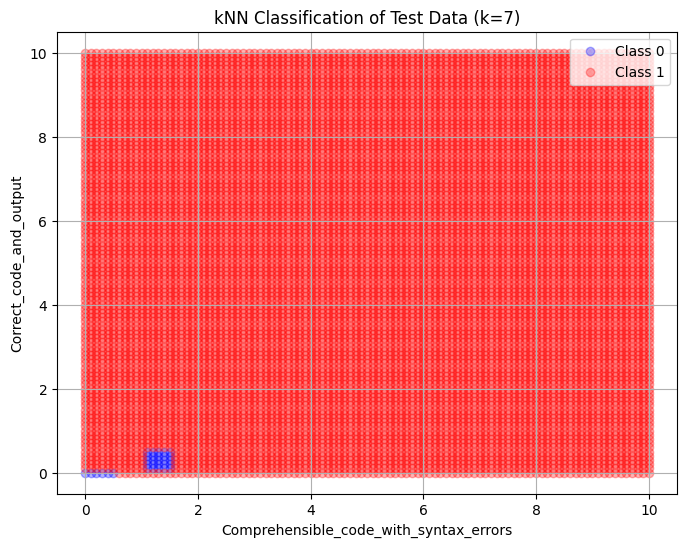

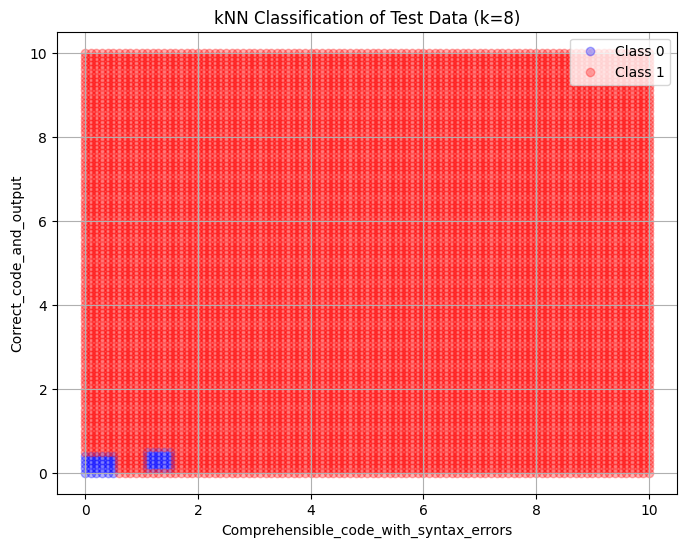

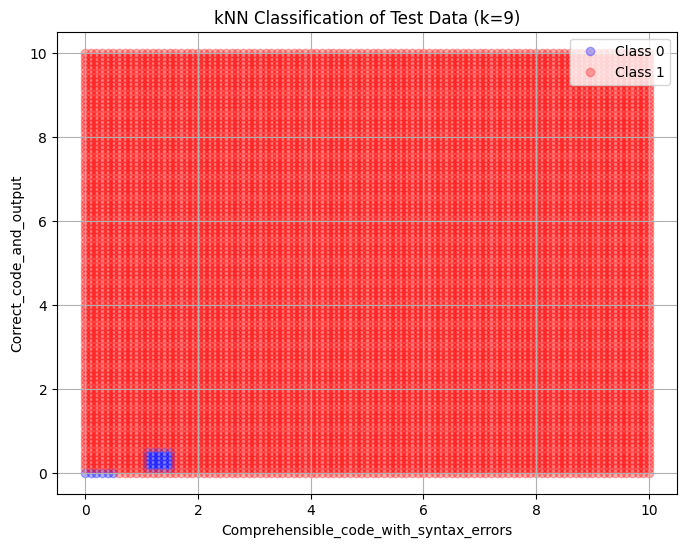

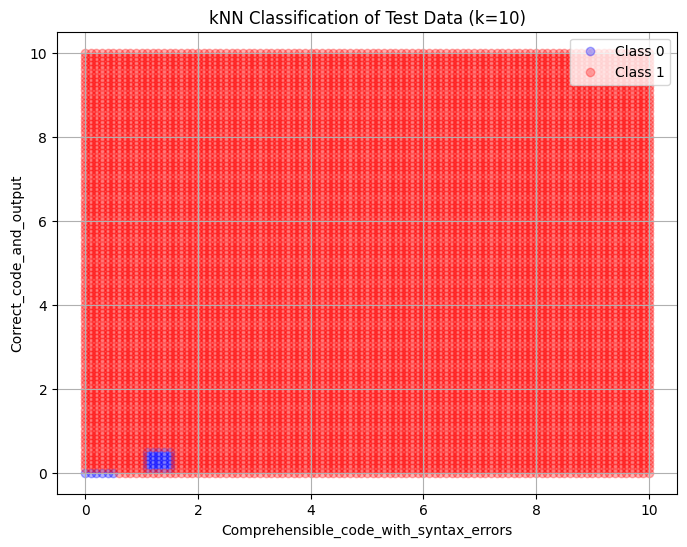

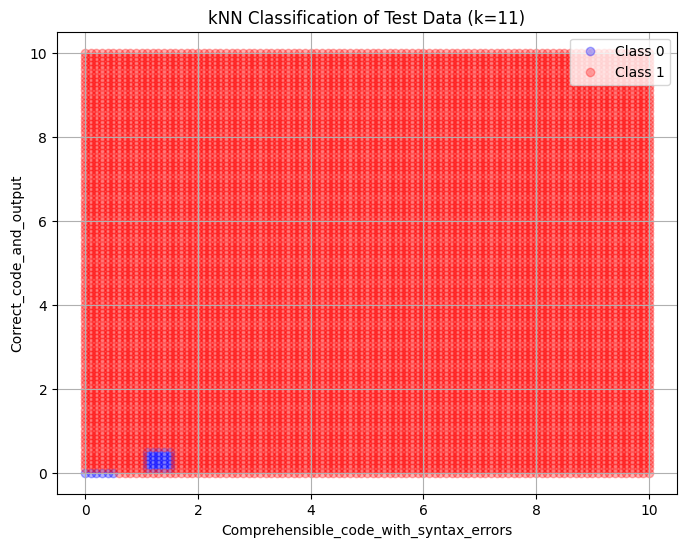

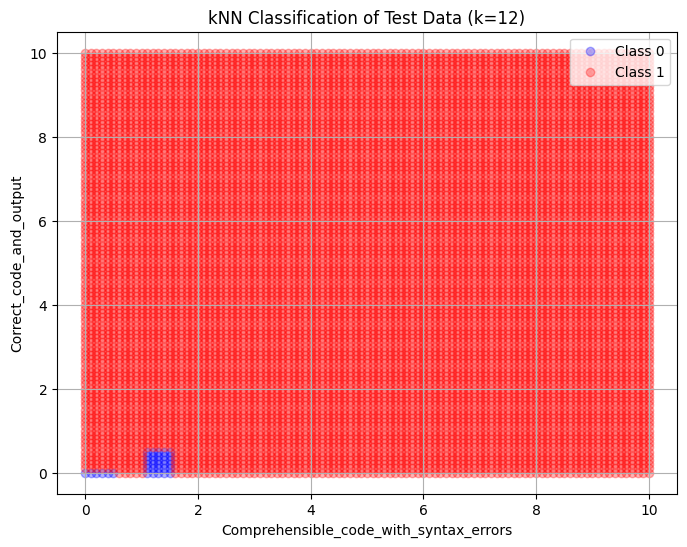

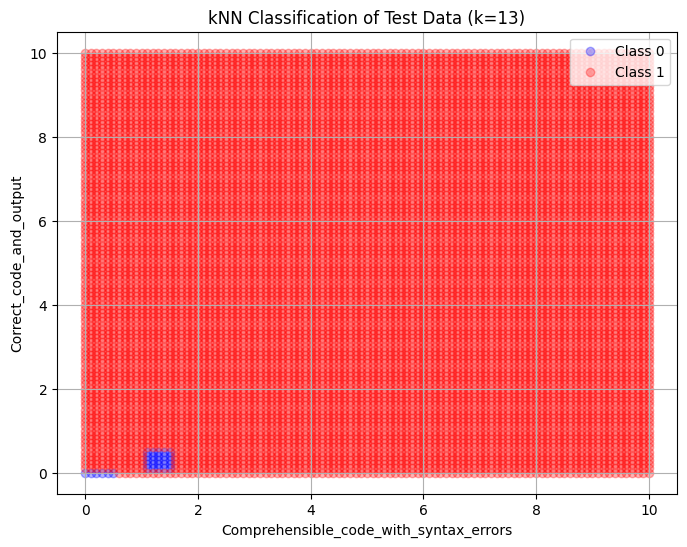

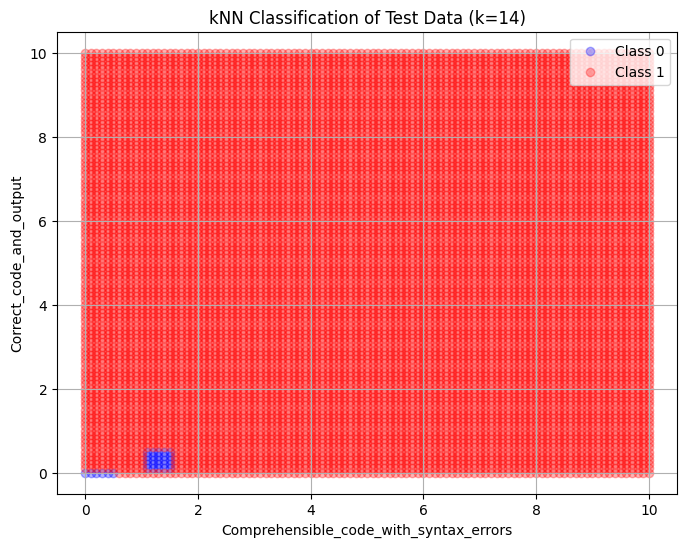

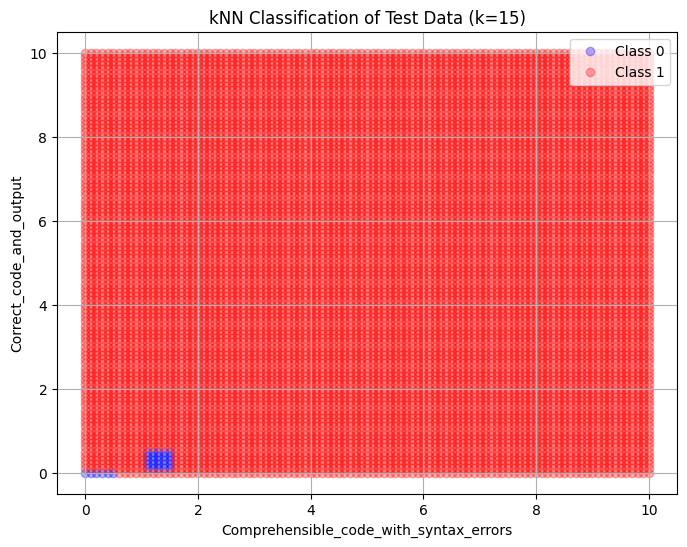

In [ ]:
#  Vary k and Plot the Decision Boundaries
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

    # Classify the test data with current k
    test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

    # Plot the classification results
    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
                test_data['Correct_code_and_output'][test_data['Class'] == 0],
                color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
                test_data['Correct_code_and_output'][test_data['Class'] == 1],
                color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Comprehensible_code_with_syntax_errors')
    plt.ylabel('Correct_code_and_output')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#7 grid search
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load and prepare the data
df = pd.read_excel('/content/cdata_final.xlsx')
df = df.fillna(method='pad')

# Process the data
df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target

# Select two features and the target
X = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize GridSearchCV with the kNN classifier and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best k value and the corresponding accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

# Test the best model on the test data
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test accuracy with best k: {test_accuracy:.4f}")


<ipython-input-38-394399732b6d>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


Best k value: 13
Best cross-validated accuracy: 0.7656
Test accuracy with best k: 0.7535


In [ ]:
# random search
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Load and prepare the data
df = pd.read_excel('/content/cdata_final.xlsx')
df = df.fillna(method='pad')

# Process the data
df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target

# Select two features and the target
X = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']]
y = df['Target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {'n_neighbors': np.arange(1, 31)}

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best k value and the corresponding cross-validation accuracy
print(f"Best k value: {random_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.4f}")

# Evaluate on the test data
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy with best k: {test_accuracy:.4f}")


<ipython-input-40-61ea187e5fe4>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


Best k value: 16
Best cross-validation accuracy: 0.7656
Test accuracy with best k: 0.7535
